In [1]:
import numpy as np
import lbg_forecast.nz as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparameters as hyp
import lbg_forecast.population_model as pop
import lbg_forecast.priors_mass_func as pr
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import prospect.models.transforms as ts
import lbg_forecast.sfh as sfh

In [2]:
# initalise fsps emulator
model = em.fsps_emulator("/Users/fpetri/repos/LBGforecast")
bounds = hyp.hyperparameter_tighter()
nhypersamples = 50
hyperparameter_samples = np.vsplit(hyp.sample_prior_parameters(nhypersamples, bounds[0], bounds[1]), nhypersamples)
prior_data = pr.preload_prior_data(zmax=7.0)

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


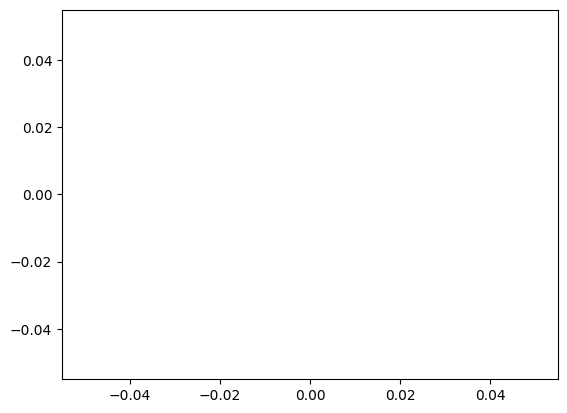

In [3]:
nsamples = 1000
nzs = []
spsp = []
for row in hyperparameter_samples:
    sps_params = pop.generate_sps_parameters(nsamples, row[0], prior_data, uniform_redshift_mass=False, uniform_logf=False)
    spsp.append(sps_params)

In [4]:
logsfrs = np.vstack(spsp)[:, 10:-1]
mass = np.vstack(spsp)[:, -1]

sfrs = []

i = 0
while(i < mass.shape[0]):
    sfrs.append(ts.logsfr_ratios_to_sfrs(np.log10(mass[i]), logsfrs[i, :], sfh.default_agebins()))
    i+=1

sfrs = np.array(sfrs)


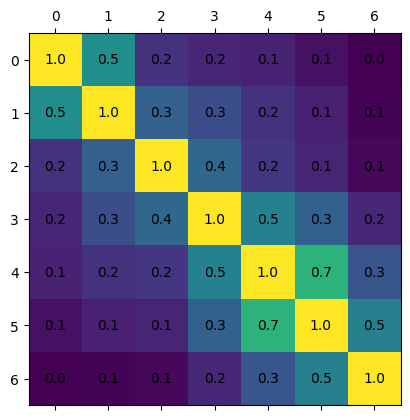

In [5]:
correlations = np.corrcoef(sfrs.T)
plt.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
